Approach:

1) Import necessary libraries

2) read an image

3) convert to GrayScale

4) apply threshold

5) apply blur

6) draw contours or circle over original image for detection

7) Count the object


# Importing all the necessary libraries

In [ ]:
import cv2
import os
import glob
import skimage
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from skimage import filters 
from skimage import io 
from scipy import ndimage
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Reading Image 

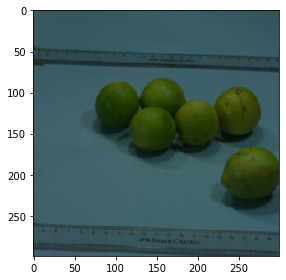

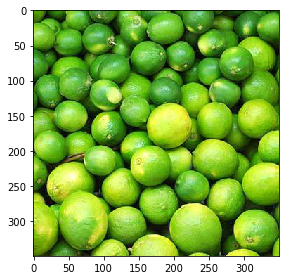

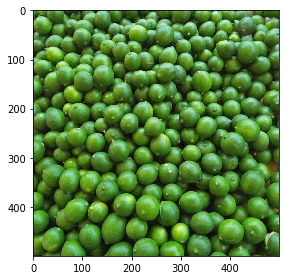

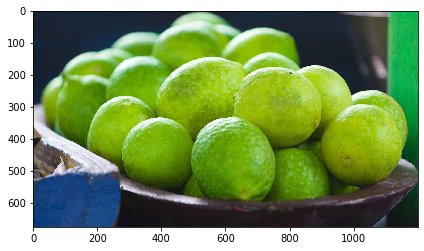

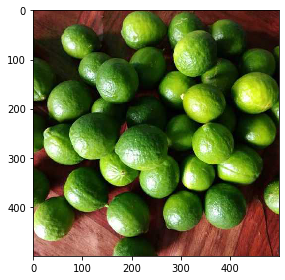

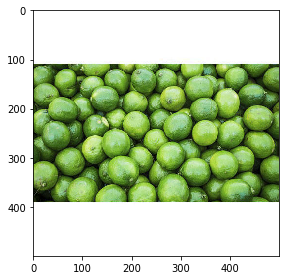

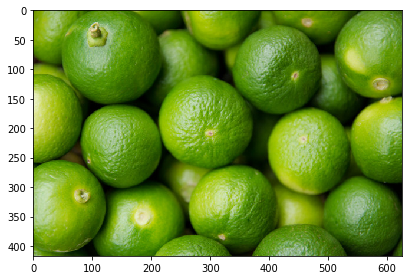

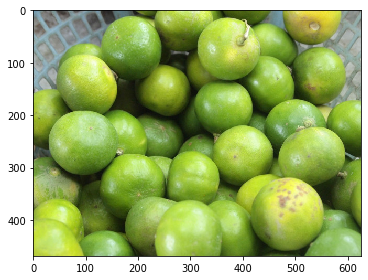

In [ ]:
img_dir = "/content/drive/My Drive/Lemon/Coding_round_images"
data_path = os.path.join(img_dir,'*g') 
files = glob.glob(data_path) 
data = []
# def load_multiple_images(img_dir: str=None) -> None:
#     """
#     View multiple images stored in files, stacking vertically

#     Arguments:
#         filename: str - path to filename containing image
#     """
#     image = mpimg.imread(img_dir)
#     # <something gets done here>
#     plt.figure()
#     plt.imshow(image)

# for f1 in files:
#   #img = cv2.imread(f1)
#   load_multiple_images(f1)
#   data.append(f1)   
for f1 in files:
  images = io.imread(f1)
  data.append(f1)
  io.imshow(images) 
  io.show() 

In [ ]:
print(data)

['/content/drive/My Drive/Lemon/Coding_round_images/1.jpeg', '/content/drive/My Drive/Lemon/Coding_round_images/2.jpg', '/content/drive/My Drive/Lemon/Coding_round_images/3.jpg', '/content/drive/My Drive/Lemon/Coding_round_images/4.jpg', '/content/drive/My Drive/Lemon/Coding_round_images/5.jpg', '/content/drive/My Drive/Lemon/Coding_round_images/6.jpg', '/content/drive/My Drive/Lemon/Coding_round_images/7.jpg', '/content/drive/My Drive/Lemon/Coding_round_images/8.jpg']


Preprocessing the image
Steps include :

1) Blurring technique is used in the image to remove noise or any unnecessary spots in the image. 

2) Thresholding technique is used to convert the image to a binary image (i.e. with only 2 pixel values either 0 or 255 etc) with respect to a chosen threshold pixel intensity.

 


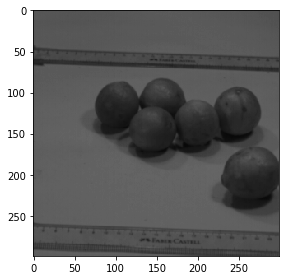

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


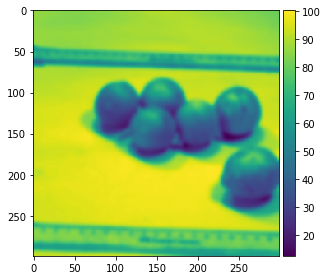

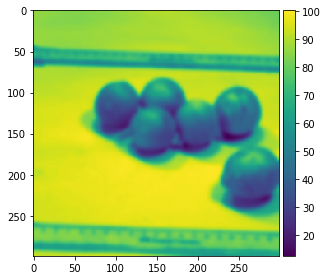

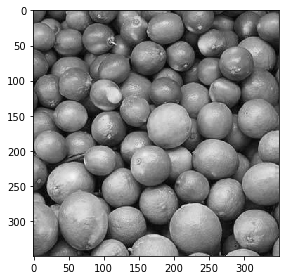

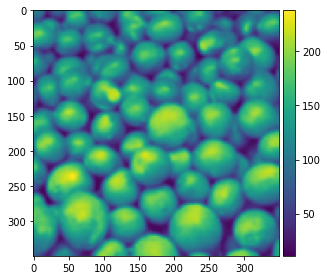

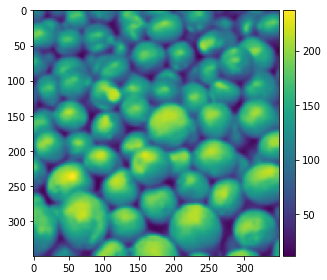

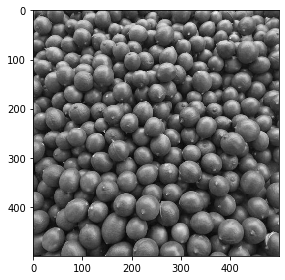

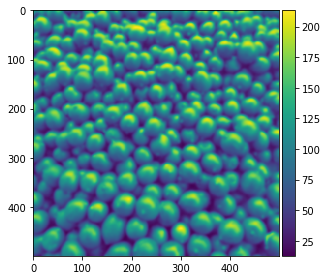

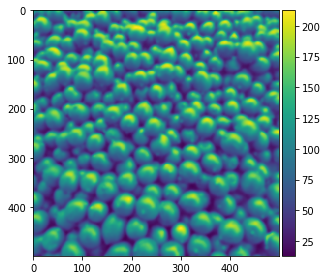

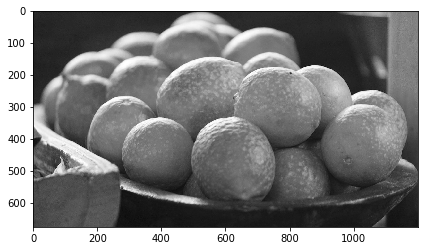

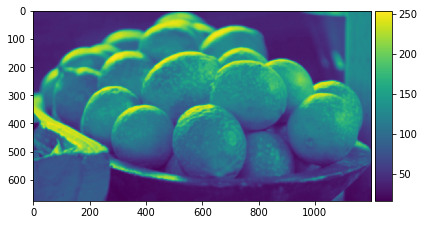

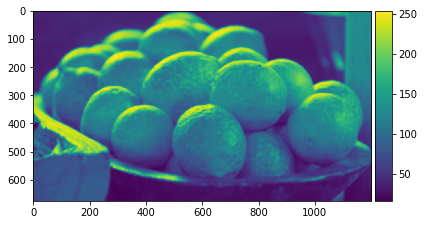

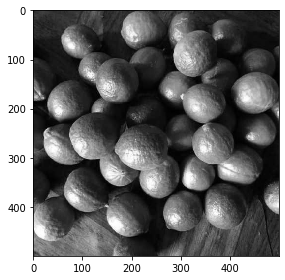

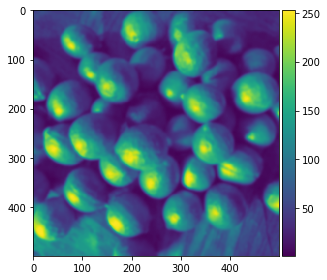

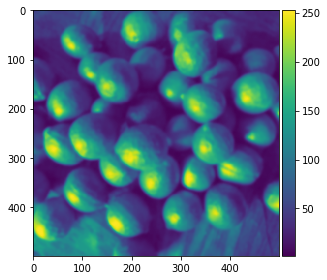

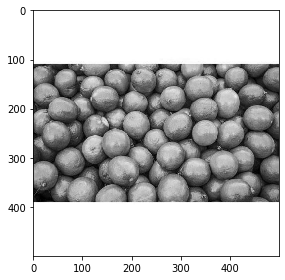

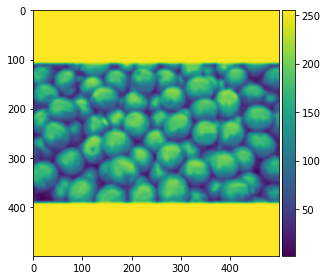

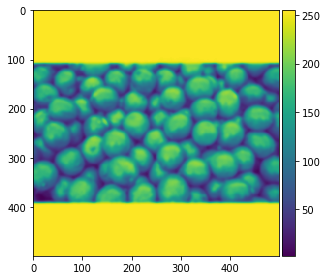

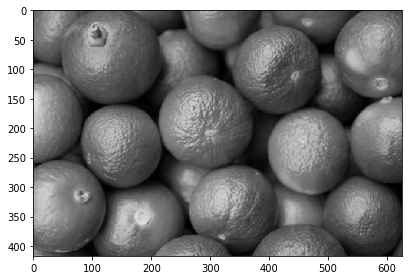

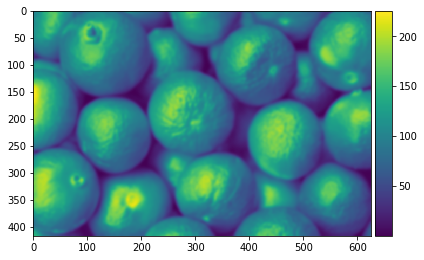

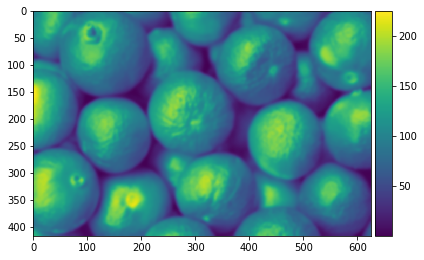

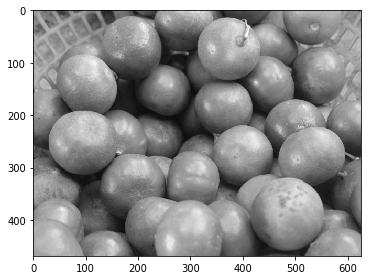

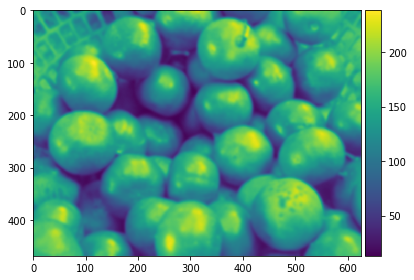

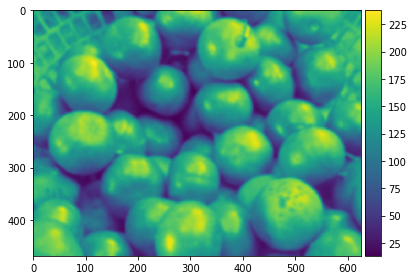

In [ ]:
for f1 in files:
  images = io.imread(f1)
  img = cv2.cvtColor(images, cv2.COLOR_BGR2GRAY)
  gaussian = filters.gaussian(img, sigma = 0.4)
  threshold = filters.threshold_local(img, 15) #Compute a threshold mask image based on local pixel neighborhood.
  #threshold = cv2.threshold(images, 0, 255, cv2.THRESH_BINARY )
  median = filters.median(threshold)
  io.imshow(gaussian)
  io.show()
  io.imshow(threshold)
  io.show() 
  io.imshow(median)
  io.show() 
  

# Contour detection: using contour to detect the lemons in over the grayscale image, in a confined area.

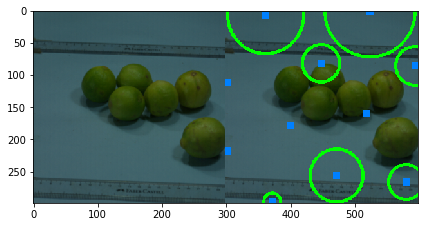

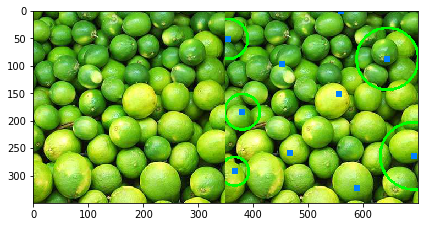

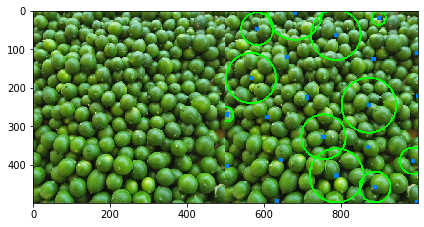

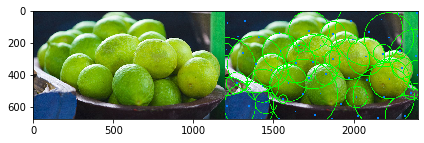

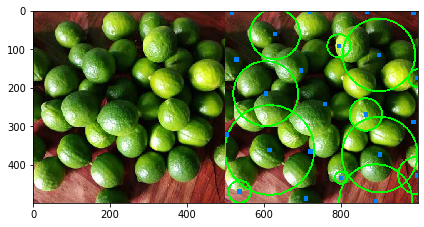

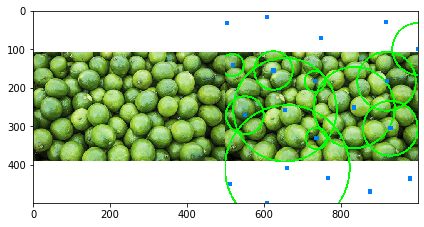

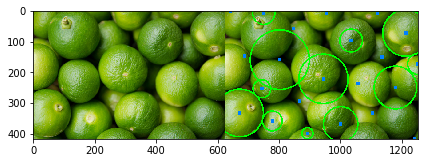

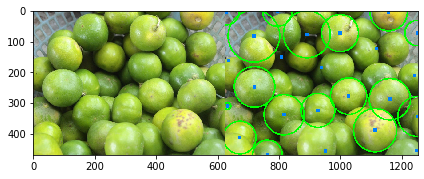

In [ ]:
count = []
for f1 in files:
  images = io.imread(f1)
  output = images.copy()
  img = cv2.cvtColor(images, cv2.COLOR_BGR2GRAY)
  # HoughCircles is an OpenCv function used to detect circles in an image takes in image, method , resolution and mindist as the essential parameters.
  circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 0.8, 110, 115, 115, 5, 5)
  # ensure at least some circles were found
  if circles is not None:
    circles = np.round(circles[0, :]).astype("int")  
    # convert the (x, y) coordinates and radius of the circles to integers
    mean_r = int(np.mean(circles, axis = 0)[2])
    # loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circles:
       # draw the circle in the output image, then draw a rectangle
       # corresponding to the center of the circle
       if (r < mean_r):
         cv2.circle(output, (x, y), r, (0, 255, 0), 4)
       cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
  count.append(mean_r)
  io.imshow(np.hstack([images, output])) 
  io.show()   

# Helper class

In [ ]:
# For Generating the circle co-ordinates and radius:
def generate_circles(gray, acc=3, min_Dist=[125]):
    for m in min_Dist:
        circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, acc, m, 120) #, 150, 10, 10)
    return circles

def draw_circles(circles, image):
    output = image.copy()
    if circles is not None:
        # convert the (x, y) coordinates and radius of the circles to integers
        circles = np.round(circles[0, :]).astype("int")
        # loop over the (x, y) coordinates and radius of the circles
        mean_r = int(np.mean(circles, axis = 0)[2])
        # print(mean_r)
        for (x, y, r) in circles:
          # draw the circle in the output image, then draw a rectangle
          # corresponding to the center of the circle
            if(r < mean_r):
                cv2.circle(output, (x, y), r, (0, 255, 0), 4)
            cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (255, 255, 255), -1)
    return output    

# For Counting 

In [ ]:
import time
for f1 in files:
  images = io.imread(f1)
  start = time.time()
  circles_wp = generate_circles(img)
  end = time.time()
  output_wp = draw_circles(circles_wp, images)
  
print("Number of Lemons: ", count)
print('time taken: ', (end-start))
  


Number of Lemons:  [76, 70, 89, 220, 127, 186, 97, 99]
time taken:  0.7144119739532471


# **Conclusion & Suggestions**
The count is more precised and better for single image rather than multiple images(using the Area dependent segmentation and Watershed algorithm).

This may not be able to give more precised result as expected, but this could be a way of dealing with multiple images.

The best option to deal with Multiple images is **DL using CNN** technique and **faster R-CNN** for real time object detection, which will give more of a precised result and can perform much better than this.

Another way of segmentation could be using ML algorithm, that is K-mean or KNN for satisfactory result.